In [220]:
##########################################ALL NEEDED IMPORT FOR THE PROJECT ############################################
####################General Imports
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
###################Imports for Splitting Data
from sklearn.model_selection import train_test_split
###################Imports for data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
###################Import for Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
##################Imports for Clasification Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
###################Imports for Accuracy check
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report



In [31]:
##########################   HELPER FUNCTION I HAVE WIRTTEN TO MAKE ANALYSYS EASY     ####################################

In [32]:
##########################################################################################################################

In [33]:
def Use_LogisticRegression(dataset,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False,min_max=False,log_penality='l2',log_iter=100, reg=1.0,poly_degree=0,c_weight=None,plot=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
        
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
        
    if(min_max == True):
        mm = MinMaxScaler()
        x_train_mm = mm.fit_transform(x_train)
        x_test_mm = mm.transform(x_test)
        x_train = x_train_mm
        x_test = x_test_mm
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    linear_model = LogisticRegression(penalty=log_penality, C=reg, solver='liblinear', max_iter=log_iter, class_weight=c_weight)
    print(linear_model)
    linear_model.fit(x_train, y_train)
    y_pred = linear_model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, linear_model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    #Uncomment to print the probabilities 
    #print((linear_model.predict_proba(x_test)))
    if(plot == True):
        print("y_test(Red) and y_pred(Green) --- Distributions \n")
        sns.distplot(y_test, kde=True, rug=True, color='red')
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        
        
        

In [34]:
def Use_KNeighborsClassifier(dataset,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False,poly_degree=0,min_max = False, knn_neigh=5,plot=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
        
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
        
    if(min_max == True):
        mm = MinMaxScaler()
        x_train_mm = mm.fit_transform(x_train)
        x_test_mm = mm.transform(x_test)
        x_train = x_train_mm
        x_test = x_test_mm
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    linear_model = KNeighborsClassifier(n_neighbors=knn_neigh)
    print(linear_model)
    linear_model.fit(x_train, y_train)
    y_pred = linear_model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, linear_model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    #Uncomment to print the probabilities 
    #print((linear_model.predict_proba(x_test)))
    if(plot == True):
        print("y_test(Red) and y_pred(Green) --- Distributions \n")
        sns.distplot(y_test, kde=True, rug=True, color='red')
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        
        
        

In [208]:
def Use_NaiveBayes(dataset,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False,min_max=False,poly_degree=0,naive_priors=None,log_trans=True ,plot=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
        
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
        
    if(min_max == True):
        mm = MinMaxScaler()
        x_train_mm = mm.fit_transform(x_train)
        x_test_mm = mm.transform(x_test)
        x_train = x_train_mm
        x_test = x_test_mm
        
    if(log_trans == True):
        logt = FunctionTransformer(np.log1p,validate=True)
        x_train_log = logt.fit_transform(x_train)
        x_test_log = logt.transform(x_test)
        x_train = x_train_log
        x_test = x_test_log
    
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    linear_model = GaussianNB(priors=naive_priors)
    print(linear_model)
    linear_model.fit(x_train, y_train)
    y_pred = linear_model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, linear_model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    #Uncomment to print the probabilities 
    #print((linear_model.predict_proba(x_test)))
    if(plot == True):
        print("y_test(Red) and y_pred(Green) --- Distributions \n")
        sns.distplot(y_test, kde=True, rug=True, color='red')
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        
        
        

In [36]:
###############################     CORRELATION HELPER FUNCTIONS       #####################################################

In [37]:
#Pearsons method or df.corr() is much useful in finding correlation between numerical columns and to make 
#sure the correlation between numerical and categorical (or) between two categorical columns is good I have 
#written few helper functions using Inferential statistics 

In [38]:
#My Correlation Function Using Inferential Statistics and PairPlot to See How Correlated Two Features are

def stats_corr2(df, input_col, output_col, plot=False):
    print("Correlation Using Inferential Statistics")
    print("___________________________________________________\n")
    print(stats.ttest_ind(df.loc[df[output_col] == 1, input_col], df.loc[df[output_col] == 0, input_col]))
    print("\n\n")
    if(plot == True):
        print("Pair Plot")
        print("___________________________________________________\n")
        sns.pairplot(df[[input_col, output_col]], hue=output_col)

In [39]:
#My Correlation Function Using Inferential Statistics and PairPlot to See How Correlated More Than 2 Features Are.

def stats_corr3(df, input_col, output_col, plot=False):
    print("Correlation Using Inferential Statistics")
    print("___________________________________________________\n")
    print(stats.f_oneway(df.loc[df[output_col] == 0, input_col], df.loc[df[output_col] == 1, input_col], df.loc[df[output_col] == 2, input_col]))
    print("\n\n")
    if(plot == True):
        print("Pair Plot")
        print("___________________________________________________\n")
        sns.pairplot(df[[input_col, output_col]], hue=output_col)

In [40]:
#My Correlation Function Using Chi2 to find Out How Correlated Two Catagorical Columns are

def stats_corr_cat(df,input_col, output_col):
    print("Correlation using Stats Chi2")
    print(stats.chi2_contingency(pd.crosstab(df[input_col],df[output_col])))

In [41]:
######################################SPECIFIC HELPER FUNCTIONS#########################################################
####THIS FUNCTION IS MY OWN INVENTION AND kind of Similar to Cumulative Probability 

In [42]:
#Helper Function to Find the Percentage of Loan for Any Column from (its Min Value to Max Value)
#Percentage of Personal Loan = (No of Personal Loan =1 columns) /(Total No of values in the column)
def percentage_loan(df, col):
    for cc in range(int(df[col].min()), int(df[col].max())+1):
        print("{0} - {1}\n".format(cc,(df.loc[df[col] >=cc,'Personal Loan'].sum()/df.loc[df[col] >=cc,'Personal Loan'].shape[0])))

In [43]:
####################################     END OF HELPER FUNCTIONS   ######################################################

In [44]:
###########################################################################################################################

In [45]:
###################################      PROJECT   STARTS   HERE         ##################################################

In [46]:
###########################################SUPERVISED LEARNING Project#############################################################

In [47]:
###############

In [48]:
###QUESTION - 1   - Read the column description and ensure you understand each attribute well

In [49]:
###############

In [50]:
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [51]:
#Setting Rows and Columns to Max, So that All the  Rows and Columns of The Dataset are displayed 
pd.set_option.max_rows =df.shape[0]
pd.set_option.max_columns = df.shape[1]

In [52]:
df.head(7)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0


In [53]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [229]:
#Finding If there are Any Missing Values
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [230]:
#Checking types
df.dtypes

Age                   int64
Experience            int64
Income                int64
ZIP Code              int64
Family                int64
CCAvg                 int64
Education             int64
Mortgage              int64
Personal Loan         int64
Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
dtype: object

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,0.2424,0.553266,0.0,0.0,0.0,0.0,2.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.3540,1.105318,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,0.1112,0.318206,0.0,0.0,0.0,0.0,2.0
Education,5000.0,1.8810,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,0.0446,0.268748,0.0,0.0,0.0,0.0,2.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0


In [54]:
#ID COLUMN NOT NEEDED 
del(df['ID'])

In [55]:
##########

In [56]:
##################### Question 2 - Study the Data Distribution in Each Column and Share your Findings #####################

In [57]:
##########

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B6DEABEDA0>,
      dtype=object)

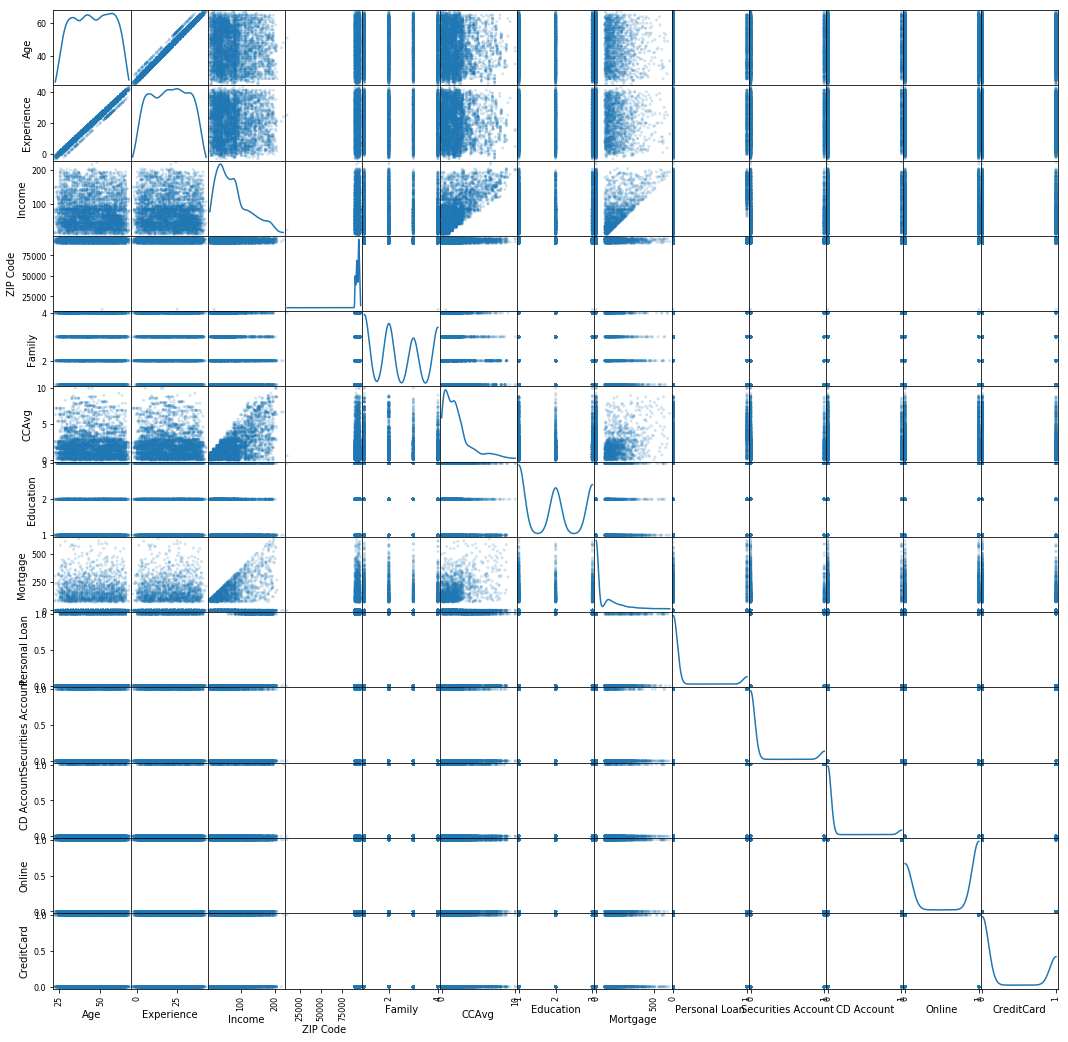

In [58]:
#QUICKY OVERVIEW OF DISTRIBUTIONS OF ALL THE COLUMNS using a Scatter Matrix
scatter_matrix(df, alpha=0.2, figsize=(18, 18), diagonal='kde')

In [59]:
#THERE SHOULD BE HIGH CORRELATION  BETWEEN INPUT Variables and OUTPUT Variable , 
#BUT AT THE SAME TIME INPUT Variables SHOULD Be INDEPENDENT of Each Other....
#i.e Input Variables should be in High CORRELATION with Ouput Variable 
#but among Input Variables themselves we Should avoid Correlation 
#So if Two Input Variables are Having Same Distribution there is a chance that we can eliminate one....

In [60]:
#Here Age and Experience has Similar distribution and same is the case with "CD Account" and "Securities Account" etc...
#So one of them can be eliminated or both can be eliminated if one or none is having correlation with output column 

In [61]:
#So From Distribution we can get an insight in to relations ships of Input Variables within other Input Variables ..

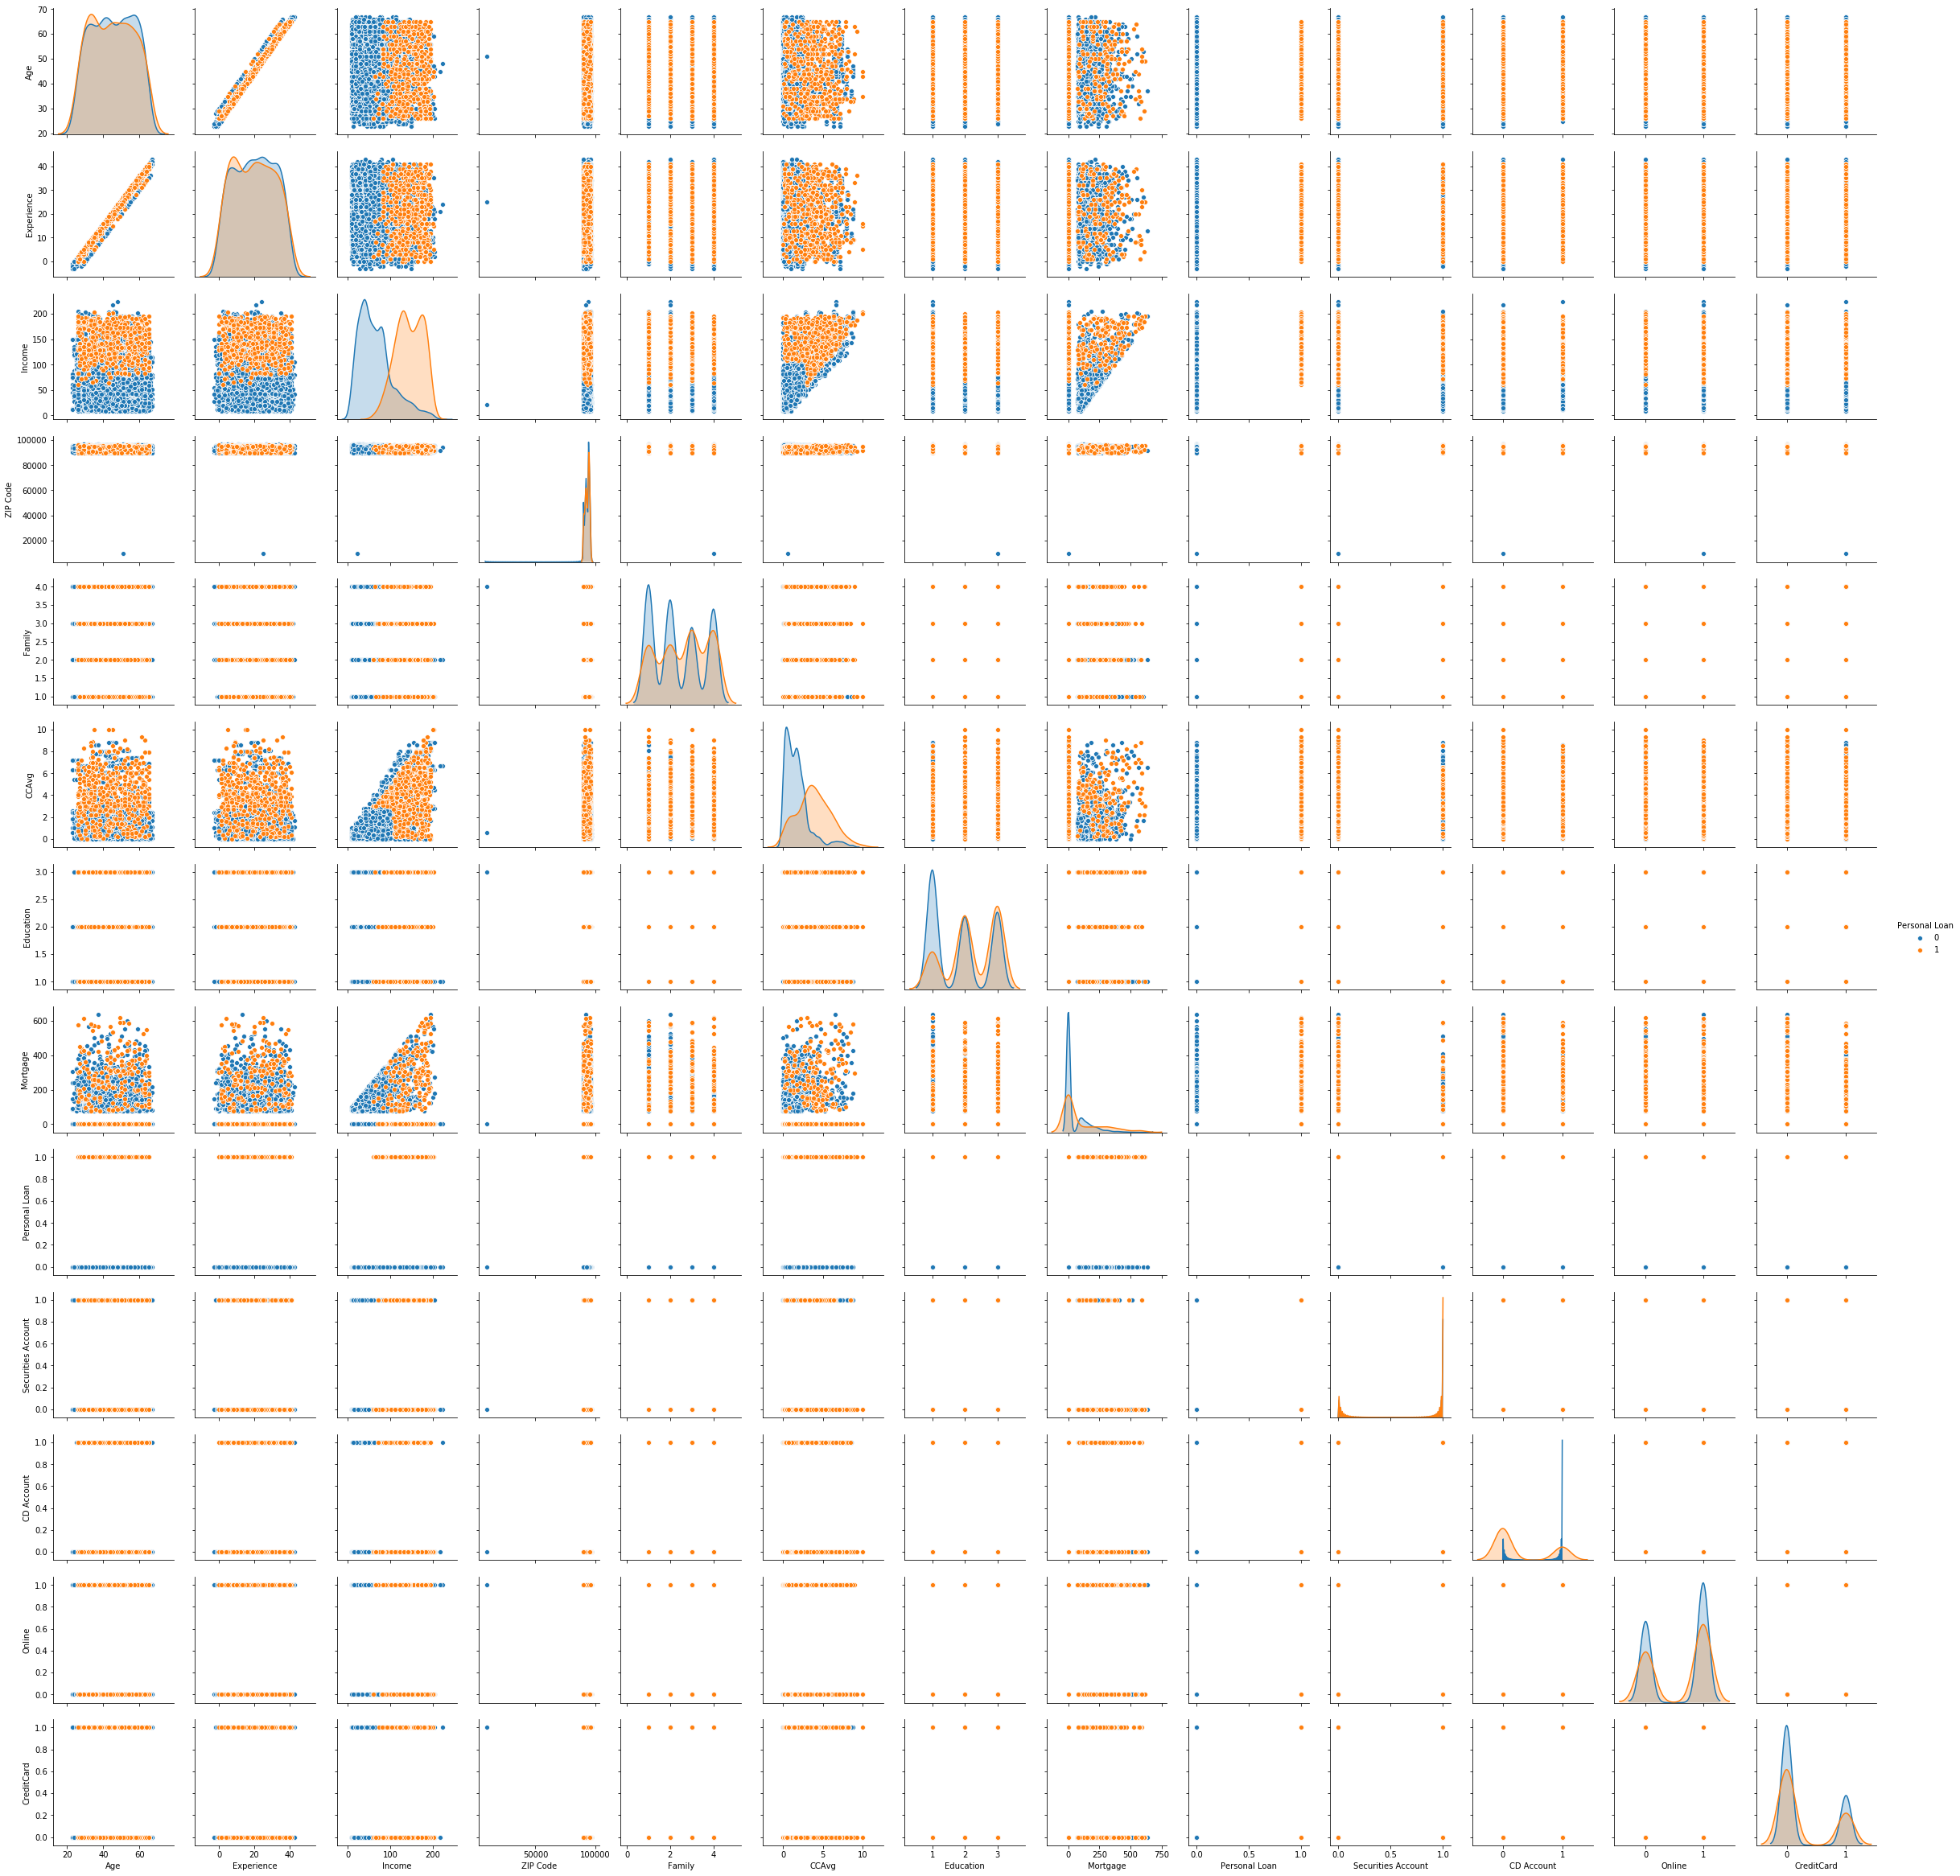

In [63]:
#Plotting All the Columns with Respect to our Target Column "Personal Loan" with a PairPlot
sns.pairplot(df, hue='Personal Loan')

In [64]:
############FROM THE ABOVE PAIR PLOT We Can See -----'Income', 'Family', 'CCAvg','Education', 'Mortgage','CD Account'-----
#are in High Correlation with the Ouput Column (Personal Loan).....We Have Come to this Conclusion Using 
#Pairplot and Data Distribution of each Input Variable.I would also love to verify this correlation using Inferential
#Statistics further 

In [65]:
#Age not in correlation to Personal Loan ---Now Since Age and Experince are having similar Distributions both can be
#eliminated and similar logic applies to other Input Variables having similar distributions 

In [66]:
######FINDING CORRELATION FROM HELPER FUNCTIONS WRITTEN ABOVE WHICH USES INFERENTIAL STATISTICS ...
#####df.corr()(Person methodmight)might not give Great Results when Comparing Numerical and Categorical Data...
##So Using Inferential Stats and pair plots.

In [67]:
###'Income', 'Family', 'CCAvg','Education', 'Mortgage','CD Account'   - High Correlation Columns 

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=27.882127015069404, pvalue=3.8302661578168557e-159)



Pair Plot
___________________________________________________



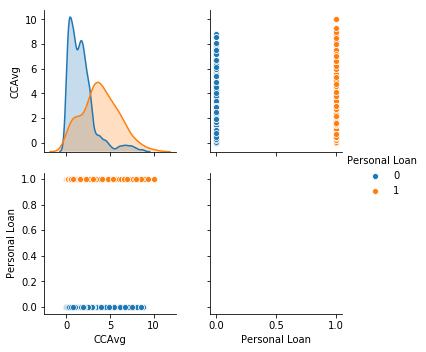

In [68]:
#Columns CCAvg - P value extremly small and so in high correlation with 'Personal Loan'(pairplot too shows high correlation)
stats_corr2(df, 'CCAvg', 'Personal Loan', plot=True)

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=23.576033174385408, pvalue=1.2784028484478752e-116)



Pair Plot
___________________________________________________



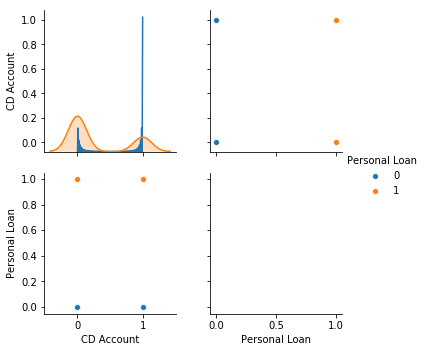

In [69]:
#Columns 'CD Account' - pvalue is very small and less thatn 0.05 so we can say its in correlation with 'Personal Loan'
stats_corr2(df, 'CD Account', 'Personal Loan', plot=True)

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=4.34662958524817, pvalue=1.4099040685673807e-05)



Pair Plot
___________________________________________________



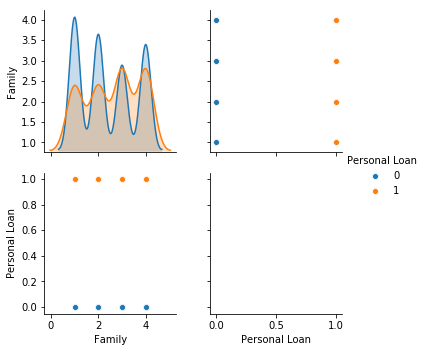

In [70]:
#Columns Family - pvalue is very small and less thatn 0.05 so we can say its in correlation with 'Personal Loan'
stats_corr2(df, 'Family', 'Personal Loan', plot=True)

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=10.148618914431497, pvalue=5.73034172157401e-24)



Pair Plot
___________________________________________________



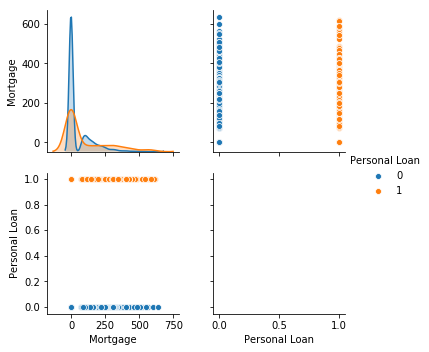

In [71]:
#Columns Mortgage - pvalue is very small and less thatn 0.05 so we can say its in correlation with 'Personal Loan'
stats_corr2(df, 'Mortgage', 'Personal Loan', plot=True)

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=9.757366156256907, pvalue=2.70966319357669e-22)



Pair Plot
___________________________________________________



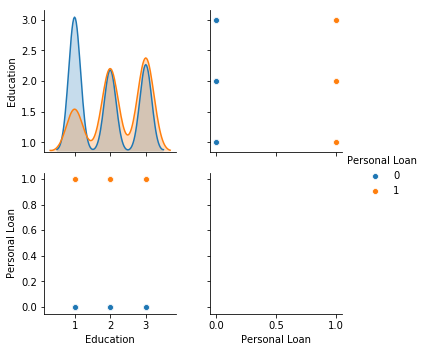

In [72]:
#Columns Education - pvalue is very small and less thatn 0.05 so we can say its in correlation with 'Personal Loan'
stats_corr2(df, 'Education', 'Personal Loan', plot=True)

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=41.08533291207552, pvalue=0.0)



Pair Plot
___________________________________________________



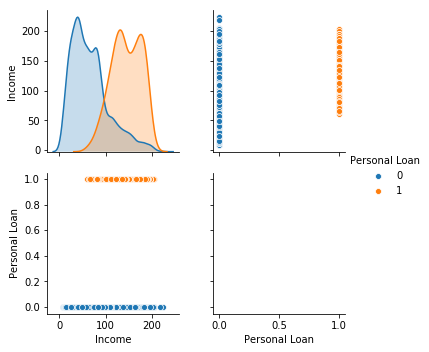

In [73]:
#Columns Income - pvalue is 0.0 but still its less thatn 0.05 so we can say its in correlation with 'Personal Loan'
stats_corr2(df, 'Income', 'Personal Loan', plot=True)

In [74]:
#RUNNING INFERENTIAL STATS FUCNTION IN A LOOP ON ALL COLUMNS JUST TO CONFIRM THAT OTHER COLUMNS CAN BE ELIMINATED 
#FOR THE MODEL TO DO GOOD

In [75]:
for col in df.columns:
    print(col)
    print("\t")
    stats_corr2(df, col, 'Personal Loan')

Age
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=-0.5461906615539323, pvalue=0.584959263705325)



Experience
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=-0.5240947451995412, pvalue=0.600235883164189)



Income
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=41.08533291207552, pvalue=0.0)



ZIP Code
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=0.0075911361898747184, pvalue=0.9939435107708496)



Family
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=4.34662958524817, pvalue=1.4099040685673807e-05)



CCAvg
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indRe

In [76]:
#So its Clear that only the selected 6 columns are in high correlation and other having high pvalues can be 
#eliminated for the model to perfom well.

In [77]:
#THIS CONCLUSION IS MADE BY ANALYZING DISTRIBUTIONS , PAIRPLOTS AND INFERENTIAL STATS, TO SELECT BELOW GIVEN COLUMSN 
#                         'Income', 'Family', 'CCAvg','Education', 'Mortgage','CD Account'                               #

In [78]:
#Just Running df.corr() as a tradition ....
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [79]:
############

In [80]:
#Question 3 - Get the Target Column Distribution and Your Comments 

In [81]:
############

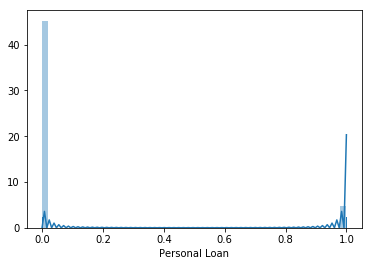

In [82]:
#Finding Target Columns Distribution (i.e Distribution of 'Personal Loan')
sns.distplot(df['Personal Loan'], kde=True, rug=True)

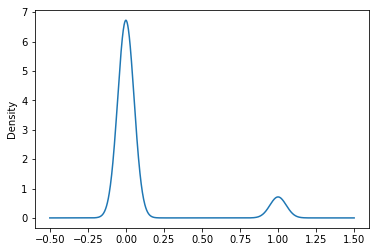

In [83]:
#An other way of getting the distribution 
df['Personal Loan'].plot(kind='kde')

In [84]:
#From the Distribution is very clear that data is unevenly distributed ...i.e there are more data of people who 
#has not taken Personal Loan compared to who has taken.

In [85]:
#Lets Confirm in other way that there are more cases of "No Personal Loan" compared to "Personal Loan"
#Percentage of People who has not taken Loan
print("Percentage of Loan takers : {0}\n".format(df.loc[df['Personal Loan']==1, 'Personal Loan'].shape[0]/df.shape[0]))
#Percentage who dint take Loan
print("Percentage who dint take Loan : {0}\n".format(df.loc[df['Personal Loan']==0, 'Personal Loan'].shape[0]/df.shape[0]))

Percentage of Loan takers : 0.096

Percentage who dint take Loan : 0.904



In [86]:
###############################       CONCLUSION FROM DISTRIBUTION    ###################################################

In [87]:
# ...Looks Like 90% of people in the dataset has not taken Perosonal Loan and only 10% took.
#So the Clasification Model Might Generate More "FALSE NEGATIVES"--WHICH CAN RESULT IN LOW RECALL 
#SO THE CHALLENGE IN BUILDING MODEL FOR THIS DATASET MIGHT BE TO REDUCE THE FN i.e TO INCREASE THE RECALL :)

In [89]:
#SINCE WE ARE NOT DONE with SMOTE kind of advanced Techniques cant Use it Here 
#..SMOTE was Just mentioned but Never Got a Chance To Experiment 
#On Top SMOTE is not available with sklearn .

In [90]:
#                           Before going to Question 4 (i.e train, test, split and applying models)                        #

In [91]:
############################## ##    CLEANING DATA BEFORE TEST TRAIN AND SPLIT    #############################################

In [92]:
###########################################################################################################################

In [93]:
#WORKING ON COLUMN CCAVG

In [94]:
#LETS FIND THE PERCENTAGE OF PEOPLE TAKING LOAN At Every CCAvg Value
#I am Using the Helper Function I wrote Above to See the Results
percentage_loan(df, 'CCAvg')

0 - 0.096

1 - 0.1305396442568586

2 - 0.19989696032972695

3 - 0.36807095343680707

4 - 0.3910806174957118

5 - 0.40384615384615385

6 - 0.3146067415730337

7 - 0.2814814814814815

8 - 0.3333333333333333

9 - 1.0

10 - 1.0



In [95]:
#This Clearly Shows that people whos
#"Average Credit Card Income " >= 9 are 100% taking Loans
#"Average Credit Card Income " >= 4 and <= 8 has 40% chances of taking Loans
def ccavg_loan(col):
    if(col >= 9):
        return 2
    elif((col >= 4) & (col <= 8)):
        return 1
    else :
        return 0

In [96]:
df['CCAvg'] = df['CCAvg'].apply(ccavg_loan)

In [97]:
df.groupby('CCAvg')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
CCAvg,,,,,,,,
0,4450.0,65.512584,40.335110,8.0,35.0,58.0,84.00,205.0
1,544.0,140.051471,32.607961,60.0,118.0,141.0,164.00,224.0
2,6.0,192.000000,11.471704,178.0,182.0,194.5,201.75,203.0


In [98]:
#Lets See if The Correlation Improved
#So after working with CCAVG the Correlation Improved......hurray :)
stats_corr2(df, 'CCAvg', 'Personal Loan')

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=28.00954547049282, pvalue=1.754146821838877e-160)





In [99]:
pd.crosstab(df['CCAvg'], df['Personal Loan'])

Personal Loan,0,1
CCAvg,,
0,4190,260
1,330,214
2,0,6


In [100]:
#DONE WITH COLUMNS CCAvg.

In [101]:
#WORKING ON INCOME COULUMN

In [102]:
percentage_loan(df, 'Income')

8 - 0.096

9 - 0.09644364074743822

10 - 0.09695011108866895

11 - 0.09740259740259741

12 - 0.09793919608243215

13 - 0.09854239375898173

14 - 0.09919404835709858

15 - 0.09983361064891846

16 - 0.10052356020942409

17 - 0.10052356020942409

18 - 0.10052356020942409

19 - 0.10165184243964422

20 - 0.10278372591006424

21 - 0.10382868267358858

22 - 0.10530934620447564

23 - 0.10683285110171378

24 - 0.1081324622662762

25 - 0.1092896174863388

26 - 0.11090573012939002

27 - 0.11090573012939002

28 - 0.11090573012939002

29 - 0.11254396248534584

30 - 0.11434016198189614

31 - 0.11608222490931076

32 - 0.11764705882352941

33 - 0.11934361014420686

34 - 0.12087635356333418

35 - 0.1225114854517611

36 - 0.12457825071372956

37 - 0.12457825071372956

38 - 0.12457825071372956

39 - 0.12735473600424516

40 - 0.1301518438177874

41 - 0.1329639889196676

42 - 0.1360544217687075

43 - 0.13909011880614314

44 - 0.1419698314108252

45 - 0.14563106796116504

46 - 0.14874496436318563

47 - 0.14

In [103]:
#From above observation income >= 150 and <= 183 there is 50% chances of taking a loan
#when income >=140 and <= 152 40% chances of taking a loan 
def income_to_loan(col):
    if((col >= 153) & (col <= 183)):
        return 2
    elif(((col >= 114) & (col <= 152)) | ((col >= 183) & (col <=190))):
        return 1
    else:
        return 0
    

In [104]:
df['Income'] = df['Income'].apply(income_to_loan)

In [105]:
#WORKING ON EXPERIENCE COLUMNS

In [106]:
#From the below Output ..its clear that Experience is not Useful in predicting "Personal Loan"..........
#As People who took Personal Loan at different Experience levels is not crosing 10%....we can drop this column 
#As well as Age as both Experience and Age are having a very similar distribution.

In [107]:
#WORKING ON FAMILY COLUMNS

In [108]:
pd.crosstab(df['Family'], df['Personal Loan'])

Personal Loan,0,1
Family,,
1,1365,107
2,1190,106
3,877,133
4,1088,134


In [109]:
#Change the Order replace 3 type with 4 and 4 Type with 3 So that the Linear Relation Holds Good 0(i.e no personal Loan)
def change_family(x):
    if(x == 3):
        return int(4)
    if(x == 4):
        return int(3)
    if(x == 1):
        return int(1)
    if(x == 2):
        return int(2)

In [110]:
df['Family'] = df['Family'].apply(change_family)

In [111]:
pd.crosstab(df['Family'], df['Personal Loan'])

Personal Loan,0,1
Family,,
1,1365,107
2,1190,106
3,1088,134
4,877,133


In [112]:
#Correlation Got Improved after apply the change_family Function 
stats_corr2(df, 'Family', 'Personal Loan')

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=5.360393904292796, pvalue=8.6773258550513e-08)





In [113]:
#WORKING ON MORTGAGE COLUMN

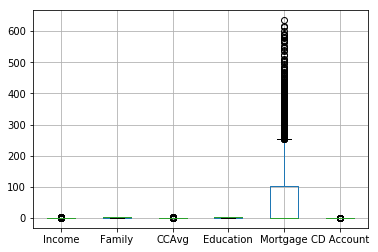

In [114]:
#We can See there are More Outlies in Mortgage 
df[['Income', 'Family', 'CCAvg','Education', 'Mortgage','CD Account']].boxplot()

In [115]:
#Using Helper Function writte in the starting to analyze the percentage of 'Personal loan' taken at ever Mortgage Value
percentage_loan(df,'Mortgage')

0 - 0.096

1 - 0.10923276983094929

2 - 0.10923276983094929

3 - 0.10923276983094929

4 - 0.10923276983094929

5 - 0.10923276983094929

6 - 0.10923276983094929

7 - 0.10923276983094929

8 - 0.10923276983094929

9 - 0.10923276983094929

10 - 0.10923276983094929

11 - 0.10923276983094929

12 - 0.10923276983094929

13 - 0.10923276983094929

14 - 0.10923276983094929

15 - 0.10923276983094929

16 - 0.10923276983094929

17 - 0.10923276983094929

18 - 0.10923276983094929

19 - 0.10923276983094929

20 - 0.10923276983094929

21 - 0.10923276983094929

22 - 0.10923276983094929

23 - 0.10923276983094929

24 - 0.10923276983094929

25 - 0.10923276983094929

26 - 0.10923276983094929

27 - 0.10923276983094929

28 - 0.10923276983094929

29 - 0.10923276983094929

30 - 0.10923276983094929

31 - 0.10923276983094929

32 - 0.10923276983094929

33 - 0.10923276983094929

34 - 0.10923276983094929

35 - 0.10923276983094929

36 - 0.10923276983094929

37 - 0.10923276983094929

38 - 0.10923276983094929

39 - 0.109

321 - 0.3836477987421384

322 - 0.3860759493670886

323 - 0.391025641025641

324 - 0.39869281045751637

325 - 0.39869281045751637

326 - 0.4

327 - 0.40268456375838924

328 - 0.3972602739726027

329 - 0.40559440559440557

330 - 0.40714285714285714

331 - 0.41304347826086957

332 - 0.41605839416058393

333 - 0.41605839416058393

334 - 0.4253731343283582

335 - 0.42857142857142855

336 - 0.42857142857142855

337 - 0.4318181818181818

338 - 0.4351145038167939

339 - 0.4351145038167939

340 - 0.4351145038167939

341 - 0.4351145038167939

342 - 0.4453125

343 - 0.43548387096774194

344 - 0.43089430894308944

345 - 0.4344262295081967

346 - 0.4380165289256198

347 - 0.4380165289256198

348 - 0.4380165289256198

349 - 0.4380165289256198

350 - 0.4380165289256198

351 - 0.4380165289256198

352 - 0.43333333333333335

353 - 0.4358974358974359

354 - 0.4396551724137931

355 - 0.43859649122807015

356 - 0.4424778761061947

357 - 0.4424778761061947

358 - 0.44144144144144143

359 - 0.44036697247706

In [116]:
#when Mortgage >= 399 and <= 617 There is 50% chances of taking a Loan 
#when Mortage >= 326 and <= 398 There is 40% chances of taking a loan
def change_mortgage(x):
    if((x >= 399) & (x <= 617)):
        return 2
    elif((x >= 326) & (x <= 398)):
        return 1
    else:
        return 0

In [117]:
#Before applying Function ....we have already see that pvalue is small 
stats_corr2(df, 'Mortgage', 'Personal Loan')

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=10.148618914431497, pvalue=5.73034172157401e-24)





In [118]:
#Hurayyyyy...Relation of Mortgage with 'Personal Loan' improved after applying the logic :)
df['Mortgage'] = df['Mortgage'].apply(change_mortgage)

In [119]:
stats_corr2(df, 'Mortgage', 'Personal Loan')

Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=13.86758530286852, pvalue=6.16149399653865e-43)





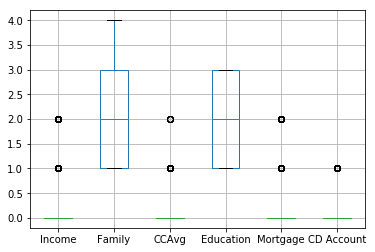

In [120]:
#Outliers In Mortgage are eliminated after apply the Function above
df[['Income', 'Family', 'CCAvg','Education', 'Mortgage','CD Account']].boxplot()

In [121]:
pd.crosstab(df['Mortgage'], df['Personal Loan'])

Personal Loan,0,1
Mortgage,,
0,4431,420
1,52,22
2,37,38


In [122]:
#Changing the Order of Mortgage to have a Better lineaer Relation with 0,1,2 and personal loan taken
def exp_mortgage(x):
    if(x == 0):
        return 0
    if(x == 1):
        return 2
    if(x == 2):
        return 1

In [123]:
df['Mortgage'] = df['Mortgage'].apply(exp_mortgage)

In [124]:
pd.crosstab(df['Mortgage'], df['Personal Loan'])

Personal Loan,0,1
Mortgage,,
0,4431,420
1,37,38
2,52,22


In [125]:
#WORKING ON COLUMNS 'Securities Account'
#Since Both are Categorical Variable , Using Helper Function written above which uses Chi2 test

In [126]:
stats_corr_cat(df, 'Securities Account', 'Personal Loan')

Correlation using Stats Chi2
(2.172310545186504, 0.14051497326319357, 1, array([[4048.112,  429.888],
       [ 471.888,   50.112]]))


In [127]:
#Pvalue is larger than 0.05 so There is no Correlation between 'Securities Account' and 'Personal Loan'

In [128]:
#########################################       END OF DATA CLEANING     ####################################################

In [129]:
###########################################################################################################################

In [130]:
#################################APPLYING MODELS - WITH HELPERFUNCTION WRITTEN IN THE STARTING OF NOTEBOOK #############
############# I FOUND HELPER FUNCTION CAN MAKE LIFE EASIER AND GIVES FASTER RESULTS , SO HAVE COMEUP WITH THIS IDEA######

In [131]:
# I MADE CONSCIOUS EFFORT TO INCREASE THE RECALL(as its more imp in this case). I CONVERTED MANY COLUMNS TO 0 and 1 In order
#to Increase the Models ability to Approximate for More Positives .so THAT MY Recall will Increase at the cost of Precission.

In [132]:
############

In [133]:
# QUESTION 4 - TRAIN, TEST, SPLIT DATA And Aplying Different Classification Models 

In [134]:
############

In [135]:
###################################### APPLYING LOGISTIC REGRESSION ######################################################

In [136]:
#HERE I used the 'STANDARD SCALAR' and 
#Polynomial Degree 4 (Found that degree4 is making model complex and giving better results)
#THE MAIN AIM IS TO REDUCE THE FN and IMPROVE the RECALL

In [137]:
#FN IS (System Predicting that a Person wont Taken any Loan , but In Reality he is Ready to take a Loan) - and FN will be 
#high with a huge Imbalance in DATA ..So I tried Reducing FN as Insurance Company should never Miss a Person who 
#want to take a Loan 

In [138]:
# I am a bit ok to Sacrifice Precission for Recall i.e FP for FN 
#FP is (System predicts that a person wants to take a loan, but in reality he does not want to take)...
#if FP Goes HIGH, Precission comes Down ...it mean Workers Working Time Might Increase but the Companies 
#Chances of loosing a Person who wants to take a loan comes Down

In [139]:
## SO THE WHOLE WORK is to Increase the RECALL and ok to Sacrifice a bit of Precission 

In [ ]:
#Using the HELPER FUNCTION THAT IS PRESENT IN THE STARTING OF THE NOTEBOOK........

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[1348   11]
 [  16  125]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9785714285714285

Test Accuracy   : 0.982

Precision Score : 0.9191176470588235

Recall Score    : 0.8865248226950354

F1 Score        : 0.9025270758122743

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1359
           1       0.92      0.89      0.90       141

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.95    

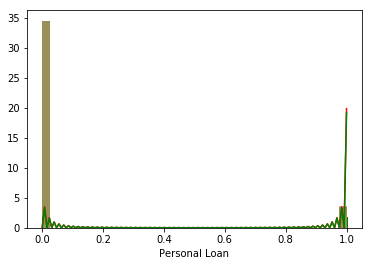

In [234]:
Use_LogisticRegression(df,['Income', 'Family', 'CCAvg','Education', 'Mortgage','CD Account'],'Personal Loan',t_size=0.3,r_state=18,s_scaler=True,poly_degree=4, plot=True)
                      

In [141]:
#Here the Y-Pred is very closely FOLLOWING Y-test so we can see only a little Red ..They almost overlapped 

In [142]:
#SO LOGISTIC REGRESSION GIVING A PRECISSION OF 92 and RECALL OF 89 ............................

In [143]:
################################### USING K NEAREST NEIGHBOUR - KNN ####################################################

In [144]:
#Even with KNN I USED STANDARD SCALER - BUT REMOVED POLYNOMIAL DEGREE

#POLYNOMIAL DEGREE INCREASEING COMPLEXCITY and LOOKS LIKE KNN is finding difficulty as Points Increase drastically and 
#for an algorithm like nearest neighbour this is not working 

#Using of Min-Max Scaler really worked to improve the accuray of KNN (it dint work with Logistic)...As we have seen the
#effect of Outliers might have effected the nearest neighbours algorithm 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[1348   11]
 [  19  122]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9754285714285714

Test Accuracy   : 0.98

Precision Score : 0.9172932330827067

Recall Score    : 0.8652482269503546

F1 Score        : 0.8905109489051095

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1359
           1       0.92      0.87      0.89       141

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500

y_test(Red) and y_pre

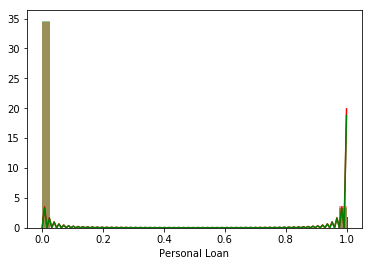

In [235]:
#KNN
Use_KNeighborsClassifier(df,['Income', 'Family', 'CCAvg','Education', 'Mortgage','CD Account'],'Personal Loan',t_size=0.3,r_state=18,s_scaler=True,min_max=True, knn_neigh=5, plot=True)
                      

In [146]:
#Here too the Y-Pred is very closely FOLLOWING Y-test so we can see only a little Red ..They almost overlapped 

In [147]:
#With KNN Precsion is 92 and Recall is 87 

In [148]:
# Logistic is Slightly Better in Case of Recall ...With Logistic Recall is 89 and Precission is same as KNN which is 92

In [149]:
####################BOTH KNN AND LOGISTIC PERFORMED ALMOST SIMILARLY WITH THE DATA -While 
#LOGISTIC REGRESSION IS HAVING A SLIGHT EDGE OVER KNN IN TERMS OF RECALL ....................

In [150]:
###################################           USING NAIVE BAYES        #####################################################

GaussianNB(priors=[0.1, 0.9], var_smoothing=1e-09)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[1106  253]
 [  12  129]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.8288571428571428

Test Accuracy   : 0.8233333333333334

Precision Score : 0.337696335078534

Recall Score    : 0.9148936170212766

F1 Score        : 0.4933078393881453

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1359
           1       0.34      0.91      0.49       141

   micro avg       0.82      0.82      0.82      1500
   macro avg       0.66      0.86      0.69      1500
weighted avg       0.93      0.82      0.86      1500

y_test(Red) and y_pred(Green) --- Distributions 



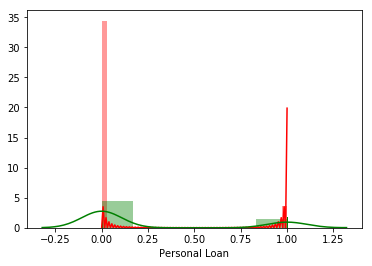

In [236]:
#Naive Bayes ..Dint Perfom Well 
#Used Log Transofrms as Probability Based Naive Baise Goes well with Log Tranforms ..It Improved Recall drastically to 91
#But precission went for a Toss

#Also used priors hyper parameter and used [0.1, 0.9] priority 
Use_NaiveBayes(df,['Income', 'Family', 'CCAvg','Education', 'Mortgage','CD Account'],'Personal Loan',t_size=0.3,r_state=18,naive_priors=[0.1,0.9],poly_degree=1,plot=True)
                      

In [152]:
#Naive Bayes go a Recall which is 91 which is the Best Recall but a very low precissioin 34 ...Overall accuracy is still 83 .
#But we can say Naive Bayes dint don well even after experimenting with priors=[0.1, 0.9]....
#USING LOG TRANSFORMS MOVED THE RECALL SCORE OF NAIVE BAYES to 91 :).........
#May be When High Recall is Expected and Bank Employees are Ready to Work Extra because of HIGH FP ..May be we can Use
#Naive Base Model :[]

In [153]:
##                           F  I   N  A  L  -       R  E  S  U  L  T  S                                                  ##

In [154]:
#NAIVEBAYES- PRECISSION - 33 , RECALL 91, ACCURACY 82 (Not a very good Model) - Eventhough the Recall is High , The Bank
#has to Invest more in to its Staff as FP goes really High and Human effort increases drastically but might give an 
#edge in terms of Recall ...Since bank wants to achieve results with Minimal Budget , This Model might not be perfect.

In [ ]:
#Since Management want to convert people as personal loan takers with Minimum Budget ....They need to Use Logistic or KNN

In [155]:
###################SO FINALLY THE WINNERS ARE 'LOGISTIC REGRESSION' & 'KNN REGRESSION' ####################################

In [156]:
#LOGITSTIC - PRECISSION - 92 , RECALL 89, ACCURACY 98

In [157]:
#KNN       - PRECISSION - 92 , RECALL 87, ACCURACY 98

In [158]:
##########################################################################################################################

In [159]:
#####################BUT WHY LOGISTIC AND KNN Peformed Better and WHY Naive Base Dint Perform ????????????????

In [160]:
#Here the 6 columns selected ['Income', 'Family', 'CCAvg','Education', 'Mortgage','CD Account'] are all having a good
#Lineare relation Ship with the Output Column 'Personal Loan' so Logistic Gave a good Result with Polydegree(4).
#The Data Cleaning is also done to Improve the Linear Relation and to Improve Recall i.e to Decrease FN(False Negative)

In [161]:
#KNN is a non-parametric approach i.e no parameters like coefficient of logistic regression etc are calculated ..
#KNN too did well and may be when the relationship between variables is highly non-linear , in that case KNN
#might dominate Logistic Regression 

In [162]:
#Naive Bayes which is highly dependent on Conditional Probability dint perform Great ...But Its Managed to Get a Great
#Recall of 91 with a huge sacrifice in Precission ..GENERALLY Naive Bayes works Better when the Input Variables are 
#Categorical compared to when they are Numeric ....so May be that is one of the Reasons in this case for Naive
#to perform little less......

In [163]:
#Just for SAKE of Questions in the PDF,  Performing LOGISTIC REGRESSION WITHOUT THE HELP OF HELPER FUNCTION :)


In [237]:
X= df[['CCAvg','CD Account', 'Mortgage', 'Education', 'Family','Income']]
Y = df['Personal Loan']

In [238]:
#Splitting Data in 70:30 Ration - 70% Training Data and 30% Testing Data
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=18)

In [239]:
#Using Standard Scaler
sc = StandardScaler()

In [240]:
x_train_sc = sc.fit_transform(x_train.astype(float))
x_test_sc = sc.transform(x_test.astype(float))

In [241]:
x_train = x_train_sc
x_test = x_test_sc

In [242]:
#Using Polynomial Features with Degree 4
poly = PolynomialFeatures(4)

In [243]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [244]:
x_train = x_train_poly
x_test = x_test_poly

In [245]:
#Instantiating LogisticRegression Model
linear_model = LogisticRegression(solver='liblinear')

In [246]:
#Fitting Data
linear_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [247]:
#Prediction on Test Data
y_pred = linear_model.predict(x_test)

In [248]:
#Testing Accuracy
accuracy_score(y_test,y_pred)

0.982

In [249]:
#Training Accuracy
accuracy_score(y_train, linear_model.predict(x_train))

0.9785714285714285

In [250]:
#Testing Precission Score
precision_score(y_test, y_pred)

0.9191176470588235

In [251]:
#Testing Recall Score
recall_score(y_test, y_pred)

0.8865248226950354

In [252]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[1348,   11],
       [  16,  125]], dtype=int64)

In [253]:
#Printing Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1359
           1       0.92      0.89      0.90       141

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

